In [1]:
%reload_kedro

# Load the unannotated data.
clips = catalog.load("tfrecord_unannotated_no_wheel_combined")

2022-06-08 10:33:10,733 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /home/daniel/git/cotton_flower_mot
2022-06-08 10:33:11,312 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-08 10:33:11,411 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-08 10:33:11,412 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-08 10:33:11,413 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-08 10:33:11,414 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-08 10:33:11,454 - kedro.extras.extension

2022-06-08 10:33:11.456 | DEBUG    | cotton_flower_mot.data_sets.tf_records_data_set:_load:47 - Loading TFRecords from /home/daniel/git/cotton_flower_mot/data/05_model_input/unannotated/no_wheel.
2022-06-08 10:33:11.824 | DEBUG    | cotton_flower_mot.data_sets.tf_records_data_set:_load:53 - Loading 3214 TFRecords files from directory.
2022-06-08 10:33:12.015797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 10:33:12.017434: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-08 10:33:12.017739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file 

In [3]:
from cotton_flower_mot.pipelines.dataset_io import rot_net_inputs_and_targets_from_dataset
from cotton_flower_mot.pipelines.config import ModelConfig

# Create the preprocessing pipeline.
config = ModelConfig(image_input_shape=(100, 100, 3), frame_input_shape=(1080, 1920, 3), detection_model_input_shape=(540, 960, 3),
                     rot_net_input_shape=(360, 360, 3), colorization_input_shape=(270, 480, 3), num_appearance_features=128, num_gcn_channels=128, sinkhorn_lambda=10.0, num_reduction_stages=2,
                     detection_sigma=3, nominal_detection_size=(0.052, 0.093))
preprocessed = rot_net_inputs_and_targets_from_dataset(clips, config=config)

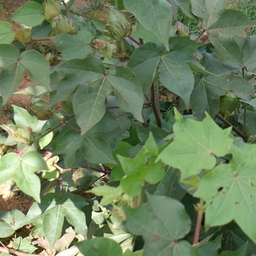

tf.Tensor(0, shape=(), dtype=int32)


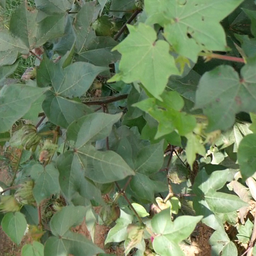

tf.Tensor(1, shape=(), dtype=int32)


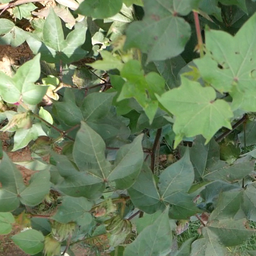

tf.Tensor(2, shape=(), dtype=int32)


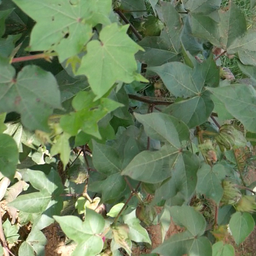

tf.Tensor(3, shape=(), dtype=int32)


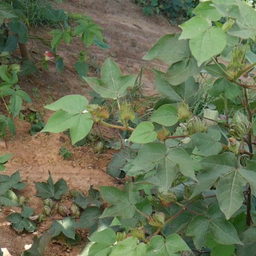

tf.Tensor(0, shape=(), dtype=int32)


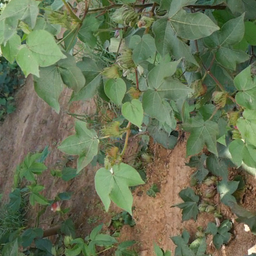

tf.Tensor(1, shape=(), dtype=int32)


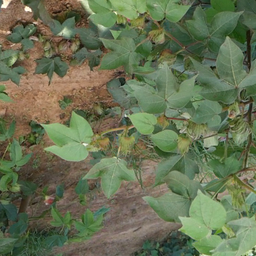

tf.Tensor(2, shape=(), dtype=int32)


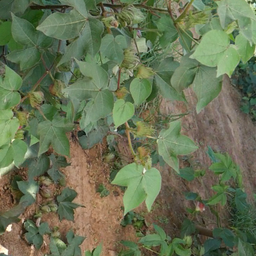

tf.Tensor(3, shape=(), dtype=int32)


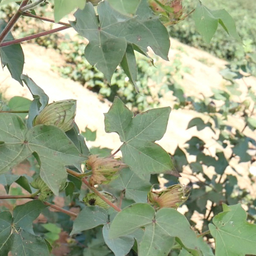

tf.Tensor(0, shape=(), dtype=int32)


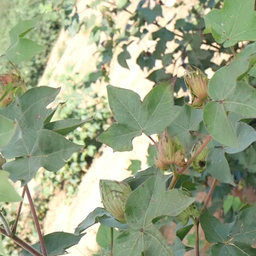

tf.Tensor(1, shape=(), dtype=int32)


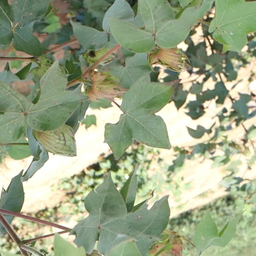

tf.Tensor(2, shape=(), dtype=int32)


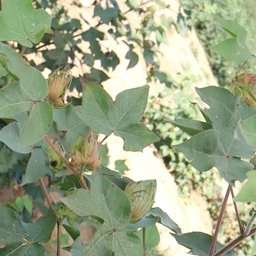

tf.Tensor(3, shape=(), dtype=int32)


In [4]:
import itertools
from PIL import Image
from IPython.display import display

# Sample the data.
for inputs, targets in itertools.islice(preprocessed.unbatch(), 12):
    # Convert BGR to RGB,
    image = Image.fromarray(inputs["frame"].numpy()[..., ::-1])
    display(image.resize((256, 256), Image.Resampling.LANCZOS))
    
    print(targets["rotation_class"])